# DS 5500 Homework 3 Solutions

### importing required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pylab import plt 
import seaborn as sns
# from sklearn import linear_model
# from sklearn.model_selection import train_test_split 
# import seaborn as sns
# import statsmodels.formula.api as sm
# from statsmodels.tools.eval_measures import rmse
# from mpl_toolkits.mplot3d import axes3d, Axes3D

### reading csv files

In [2]:
fiscal_data_file_path = 'data_files/Sdf16_1a.txt'
fiscal_data = pd.read_csv(fiscal_data_file_path, sep = '\t', low_memory=False)

In [3]:
rla_achievement_data_file_path = 'data_files/rla-achievement-lea-sy2015-16.csv'
rla_achievement_data = pd.read_csv(rla_achievement_data_file_path, low_memory=False)

## Problem 1

### federal funding for states

In [4]:
state_wise_funding = fiscal_data[['STNAME', 'TFEDREV', 'V33']]
state_wise_funding = state_wise_funding[state_wise_funding.TFEDREV.notnull()]
state_wise_funding = state_wise_funding[state_wise_funding.TFEDREV >= 0]
state_wise_funding = state_wise_funding[state_wise_funding.V33.notnull()]
state_wise_funding = state_wise_funding[state_wise_funding.V33 >= 0]
state_wise_funding = state_wise_funding.groupby(['STNAME']).sum().sort_values('TFEDREV').reset_index()
state_wise_funding = state_wise_funding.rename(columns = {'STNAME':'State', 
                                                          'TFEDREV': 'Federal_Funding', 'V33': '#Students'})

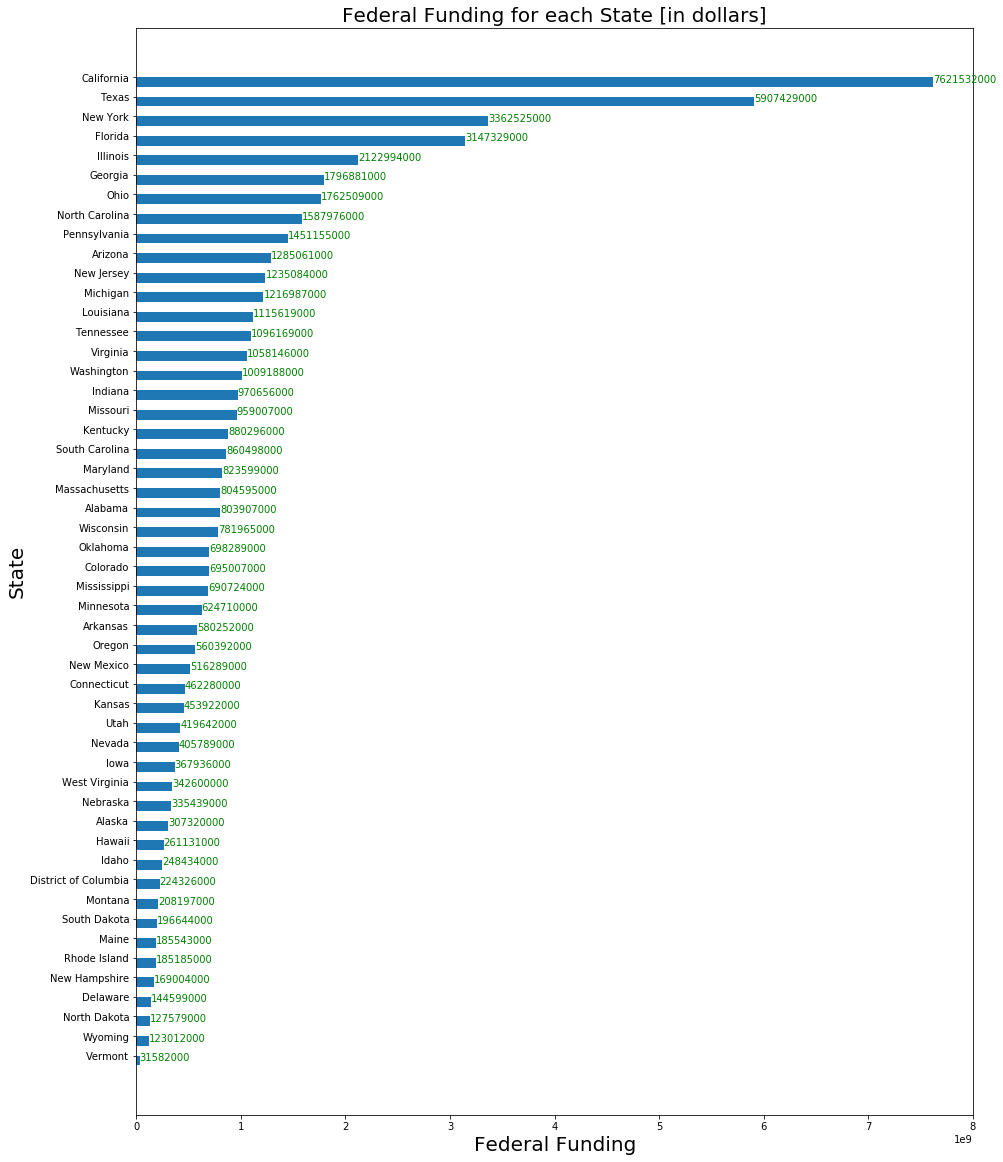

In [5]:
fig, ax = plt.subplots(figsize = (15,20))    
width = 0.5 # the width of the bars 
ind = np.arange(len(state_wise_funding.Federal_Funding))  
ax.barh(ind, state_wise_funding.Federal_Funding, width)
ax.set_yticks(ind + width/2)
ax.set_yticklabels(state_wise_funding.State, minor=False)
for i, text in enumerate(state_wise_funding.Federal_Funding):
    ax.text(text, i, str(text), color='green')
plt.title('Federal Funding for each State [in dollars]', size = 20, y = 1)
plt.xlabel('Federal Funding', size = 20)
plt.ylabel('State', size = 20)    
# plt.show()
plt.savefig('solution_figures/Q1_FFPS.png') # use format='svg' or 'pdf' for vectorial pictures

### federal funding per student for states

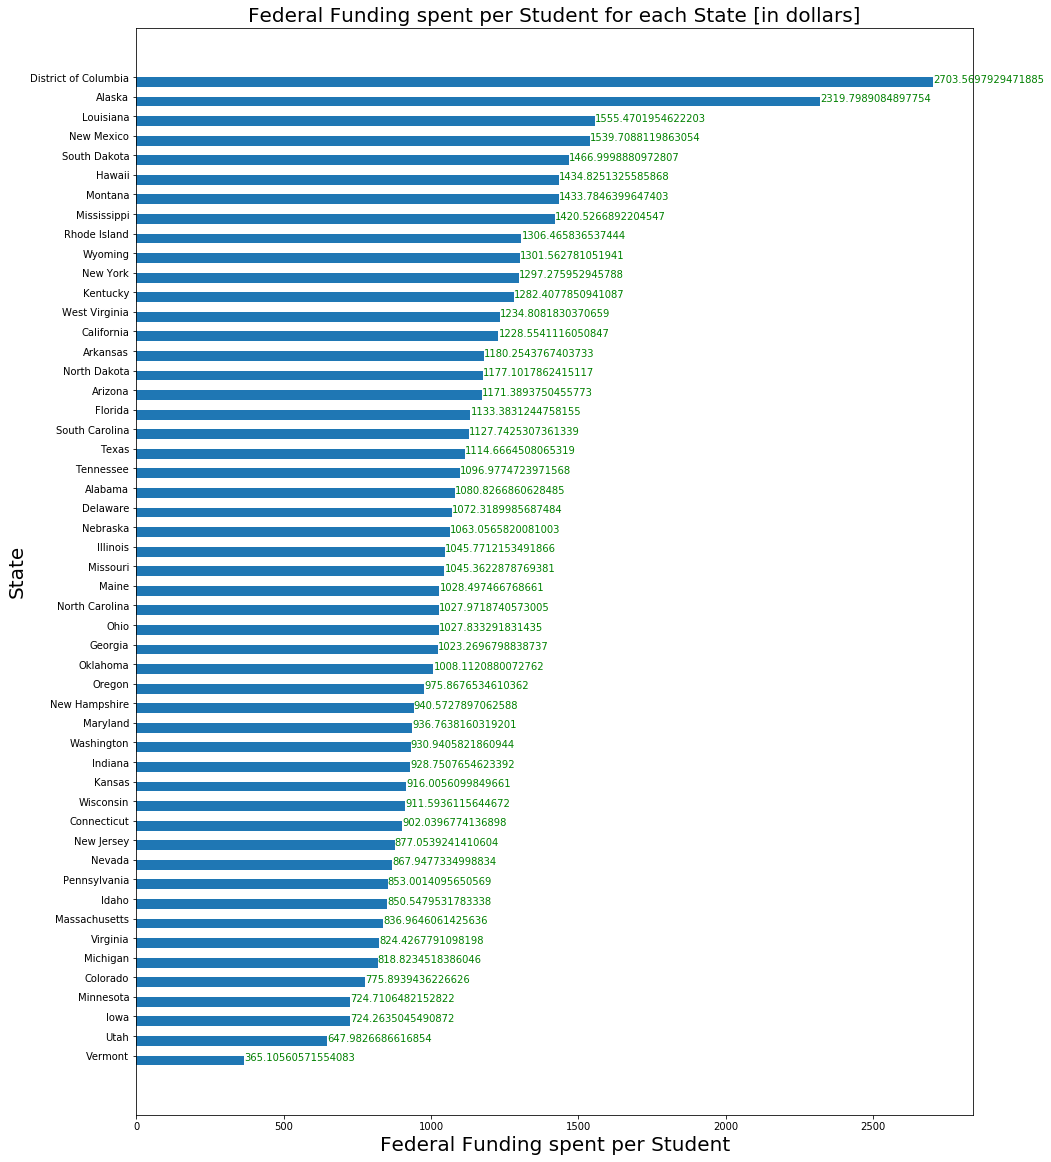

In [6]:
state_wise_funding['Federal_Funding_per_Student'] = state_wise_funding['Federal_Funding'] / state_wise_funding['#Students'] 
state_wise_funding = state_wise_funding.sort_values('Federal_Funding_per_Student').reset_index()
fig, ax = plt.subplots(figsize = (15,20))    
width = 0.5 # the width of the bars 
ind = np.arange(len(state_wise_funding['Federal_Funding_per_Student']))  
ax.barh(ind, state_wise_funding['Federal_Funding_per_Student'], width)
ax.set_yticks(ind + width/2)
ax.set_yticklabels(state_wise_funding.State, minor=False)
for i, text in enumerate(state_wise_funding['Federal_Funding_per_Student']):
    ax.text(text, i, str(text), color='green')
plt.title('Federal Funding spent per Student for each State [in dollars]', size = 20, y = 1)
plt.xlabel('Federal Funding spent per Student', size = 20)
plt.ylabel('State', size = 20)    
# plt.show()
plt.savefig('solution_figures/Q1_FFPSPS.png') # use format='svg' or 'pdf' for vectorial pictures

## Problem 2

### relationship between school districts’ total revenue and expenditures

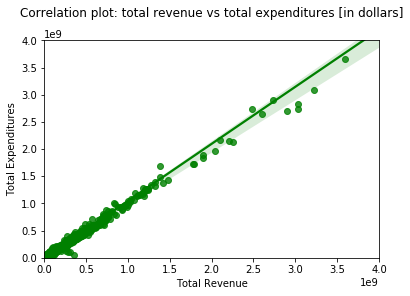

In [7]:
import seaborn as sns
fig, ax = plt.subplots()
ax = sns.regplot(x = fiscal_data['TOTALREV'], y = fiscal_data['TOTALEXP'], color="g")
plt.xlim(0, 0.4 * 1e10)
plt.ylim(0, 0.4 * 1e10)
plt.title('Correlation plot: total revenue vs total expenditures [in dollars]', y = 1.08)
plt.xlabel('Total Revenue')
plt.ylabel('Total Expenditures')    
# plt.show()
plt.savefig('solution_figures/Q2_correlation.png')

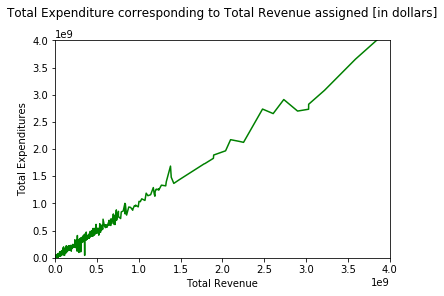

In [8]:
fiscal_data_2 = fiscal_data.sort_values('TOTALREV').reset_index()
plt.plot(fiscal_data_2.TOTALREV, fiscal_data_2.TOTALEXP, color = 'g')
plt.xlim(0, 0.4 * 1e10)
plt.ylim(0, 0.4 * 1e10)
plt.title('Total Expenditure corresponding to Total Revenue assigned [in dollars]', y = 1.08)
plt.xlabel('Total Revenue')
plt.ylabel('Total Expenditures')    
# plt.show()
plt.savefig('solution_figures/Q2_relationship.png')

### debt per student for each state

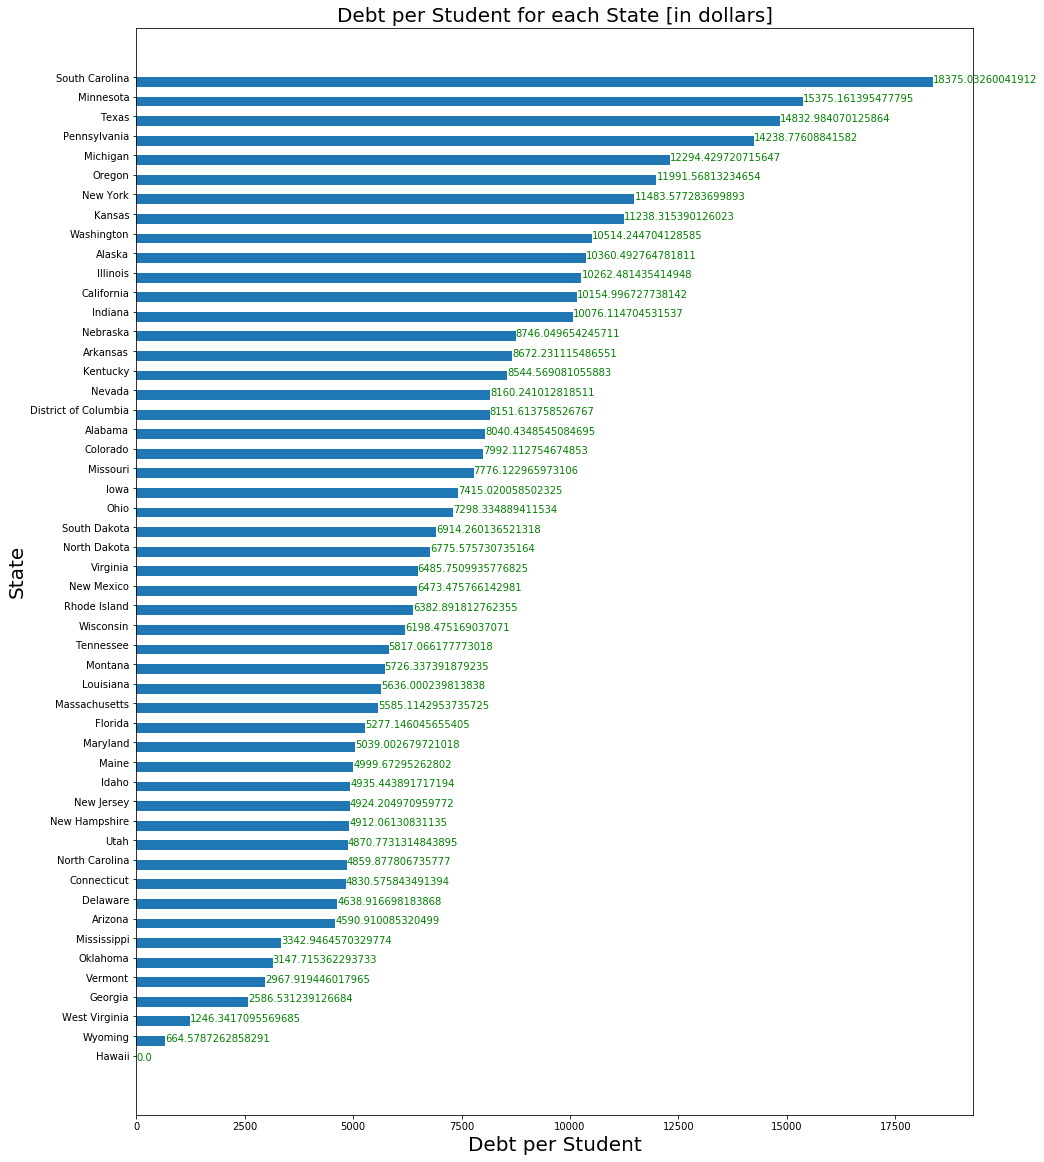

In [9]:
debt_per_student = fiscal_data[['STNAME', '_41F', '_66V', 'V33']]
debt_per_student = debt_per_student[debt_per_student._41F.notnull()]
debt_per_student = debt_per_student[debt_per_student._41F >= 0]
debt_per_student = debt_per_student[debt_per_student._66V.notnull()]
debt_per_student = debt_per_student[debt_per_student._66V >= 0]
debt_per_student = debt_per_student[debt_per_student.V33.notnull()]
debt_per_student = debt_per_student[debt_per_student.V33 >= 0]
debt_per_student = debt_per_student.groupby(['STNAME']).sum()
debt_per_student['debt_per_student'] = (debt_per_student._41F + debt_per_student._66V) / debt_per_student.V33 
debt_per_student = debt_per_student.sort_values('debt_per_student').reset_index()

fig, ax = plt.subplots(figsize = (15,20))    
width = 0.5 
ind = np.arange(len(debt_per_student['debt_per_student']))  
ax.barh(ind, debt_per_student['debt_per_student'], width)
ax.set_yticks(ind + width/2)
ax.set_yticklabels(debt_per_student['STNAME'], minor=False)
for i, text in enumerate(debt_per_student['debt_per_student']):
    ax.text(text, i, str(text), color='green')
plt.title('Debt per Student for each State [in dollars]', size = 20, y = 1)
plt.xlabel('Debt per Student', size = 20)
plt.ylabel('State', size = 20)    
# plt.show()
plt.savefig('solution_figures/Q2_DPSFS.png') # use format='svg' or 'pdf' for vectorial pictures

## Problem 3

### function for processing a single column of “blurred” metrics

In [10]:
def column_values_processing(data, column):
    blurred_values = data[column].astype(str).unique()
    
    for value in blurred_values:
        if '-' in value:
            data[column].loc[data[column] == value] = np.mean([int(range_value) for range_value in value.split('-')])
        elif 'LT' in value:
            data[column].loc[data[column] == value] = np.mean([0, int(value.split('LT')[1])])
        elif 'LE' in value:
            data[column].loc[data[column] == value] = np.quantile([0, int(value.split('LE')[1])], 0.75)
        elif 'GT' in value:
            data[column].loc[data[column] == value] = np.mean([int(value.split('GT')[1]), 100])
        elif 'GE' in value:
            data[column].loc[data[column] == value] = np.quantile([int(value.split('GE')[1]), 100], 0.25)
        elif not value.isdigit():
            data[column].loc[data[column] == value] = 50
            
    data[column] = data[column].astype(float)
    return data

### process metric of your choice - Percentage of students in the school that scored at or above proficient in Reading/Language Arts

In [11]:
values_before = rla_achievement_data.ALL_RLA00PCTPROF_1516.unique()

In [12]:
print('Raw values: ' + str(list(values_before)))

Raw values: ['33', '58', '67', '43', '60', '36', '37', '18', '59', '44', '32', '51', '23', '47', '42', '13', '16', '28', '19', '49', '17', '22', '30', '41', '25', '40', '34', '24', '35', '56', '31', '12', '45', '65', '46', '38', '10', '48', '27', '74', '57', '39', '15', '29', '73', '53', '63', '52', '10-14', '26', '40-44', '70-74', '40-49', '45-49', '76', '65-69', '11-19', 'PS', '6-9', '25-29', '30-39', '85', 'LE20', 'LT50', 'GE90', '90-94', '50', 'LE10', 'LE5', '35-39', '60-64', '21-39', '55-59', '70', '75-79', '70-79', '20-24', '30-34', '82', '80', '50-59', '80-84', '55', '50-54', 'GE80', '15-19', '62', '7', '60-79', '21', '40-59', '80-89', '20-29', '78', '60-69', '72', '20', '92', '54', '11', 'GE50', '86', '68', '75', '87', '90', '81', '77', '88', '14', '66', '71', '83', '64', '85-89', '69', '9', '5', '97', '96', '61', '8', '4', 'GE95', '6', '79', '84', '91', '89', '3', 'GE99', '93', '98', '94', '95', '2']


In [13]:
rla_achievement_data = column_values_processing(rla_achievement_data, 'ALL_RLA00PCTPROF_1516')

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
values_after = rla_achievement_data.ALL_RLA00PCTPROF_1516.unique()

In [15]:
print('Processed values: ' + str(list(values_after)))

Processed values: [33.0, 58.0, 67.0, 43.0, 60.0, 36.0, 37.0, 18.0, 59.0, 44.0, 32.0, 51.0, 23.0, 47.0, 42.0, 13.0, 16.0, 28.0, 19.0, 49.0, 17.0, 22.0, 30.0, 41.0, 25.0, 40.0, 34.0, 24.0, 35.0, 56.0, 31.0, 12.0, 45.0, 65.0, 46.0, 38.0, 10.0, 48.0, 27.0, 74.0, 57.0, 39.0, 15.0, 29.0, 73.0, 53.0, 63.0, 52.0, 26.0, 72.0, 44.5, 76.0, 50.0, 7.5, 34.5, 85.0, 92.5, 92.0, 3.75, 62.0, 70.0, 77.0, 74.5, 82.0, 80.0, 54.5, 55.0, 7.0, 69.5, 21.0, 49.5, 84.5, 24.5, 78.0, 64.5, 20.0, 54.0, 11.0, 62.5, 86.0, 68.0, 75.0, 87.0, 90.0, 81.0, 88.0, 14.0, 66.0, 71.0, 83.0, 64.0, 69.0, 9.0, 5.0, 97.0, 96.0, 61.0, 8.0, 4.0, 96.25, 6.0, 79.0, 84.0, 91.0, 89.0, 3.0, 99.25, 93.0, 98.0, 94.0, 95.0, 2.0]


### visualize it's distribution 

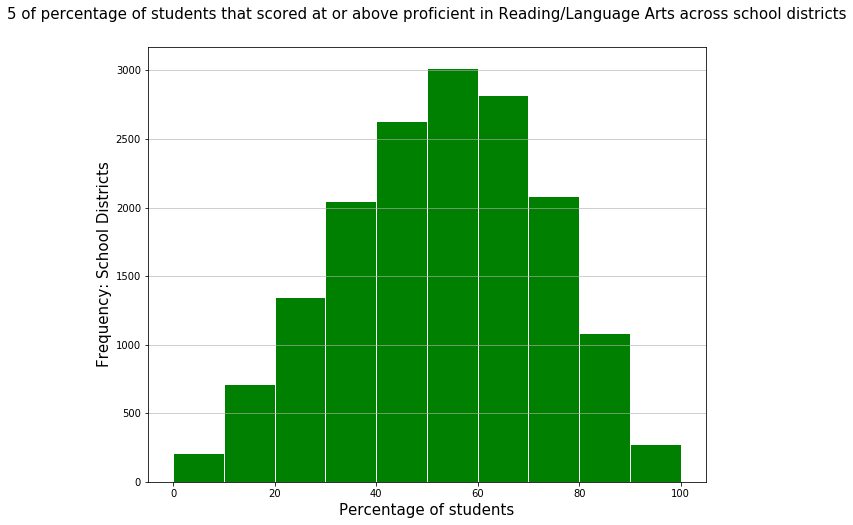

In [16]:
percent_proficient = rla_achievement_data.ALL_RLA00PCTPROF_1516

plt.figure(figsize=[10,8])
plt.hist(percent_proficient, bins = np.arange(0, 110, 10), facecolor = 'g', edgecolor = 'w')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Percentage of students', size=15)
plt.ylabel('Frequency: School Districts', size=15)
plt.title('5 of percentage of students that scored at or above proficient in Reading/Language Arts across school districts', size=15, y = 1.05)
# plt.show()
plt.savefig('solution_figures/Q3_distribution.png') # use format='svg' or 'pdf' for vectorial pictures

## Problem 4

### cutting 15% of the U.S. federal budget 

In [17]:
fiscal_data = fiscal_data[fiscal_data.TFEDREV.notnull()]
fiscal_data = fiscal_data[fiscal_data.TFEDREV > 0]
initial_federal_budget = fiscal_data.TFEDREV.sum()
total_deduction_amount = initial_federal_budget * 0.15
final_federal_budget = initial_federal_budget * 0.85

print('Total federal budget allocated before deduction: $' + str(initial_federal_budget))
print('Total federal budget to be deducted: $' + str(total_deduction_amount))
print('Total federal budget allocated after deduction: $' + str(final_federal_budget))

Total federal budget allocated before deduction: $55602742000
Total federal budget to be deducted: $8340411300.0
Total federal budget allocated after deduction: $47262330700.0


### cutting funds from school districts

In [18]:
revenue_data = fiscal_data[['LEAID', 'TFEDREV', 'TSTREV', 'TLOCREV']]
revenue_data = revenue_data[revenue_data.TSTREV.notnull()]
revenue_data = revenue_data[revenue_data.TSTREV >= 0]
revenue_data = revenue_data[revenue_data.TLOCREV.notnull()]
revenue_data = revenue_data[revenue_data.TLOCREV >= 0]

revenue_data['total_other_revenue'] = revenue_data.TSTREV + revenue_data.TLOCREV
revenue_data = revenue_data.sort_values('total_other_revenue', ascending = False).reset_index()

revenue_data['amount_deducted'] = [0] * revenue_data.TFEDREV.shape[0]
revenue_data['final_federal_funding'] = revenue_data.TFEDREV

for index in range(revenue_data.shape[0]):
    deduction_amount = revenue_data.TFEDREV[index] * 0.25
    if total_deduction_amount < deduction_amount:
        revenue_data.amount_deducted[index] = total_deduction_amount
        revenue_data.final_federal_funding[index] = revenue_data.TFEDREV[index] - total_deduction_amount
        print('number of school districts for which federal funding is deducted: ' + str(index))
        break
    else:
        total_deduction_amount -= deduction_amount
        revenue_data.amount_deducted[index] = deduction_amount
        revenue_data.final_federal_funding[index] = revenue_data.TFEDREV[index] - deduction_amount
        
revenue_data = revenue_data.drop(columns = ['index', 'TSTREV', 'TLOCREV', 'total_other_revenue'])
revenue_data = revenue_data.rename(columns = {'TFEDREV': 'initial_federal_funding'})

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


number of school districts for which federal funding is deducted: 1351


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
revenue_data[:25]

,LEAID,initial_federal_funding,amount_deducted,final_federal_funding
0,3620580,1739101000,434775250,1304325750
1,0622710,1091400000,272850000,818550000
2,1709930,792420000,198105000,594315000
3,1200390,431519000,107879750,323639250
4,3200060,277628000,69407000,208221000
5,2400480,112717000,28179250,84537750
6,1500030,261131000,65282750,195848250
7,4218990,271369000,67842250,203526750
8,5101260,126061000,31515250,94545750
9,1200180,278292000,69573000,208719000
